In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 2#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

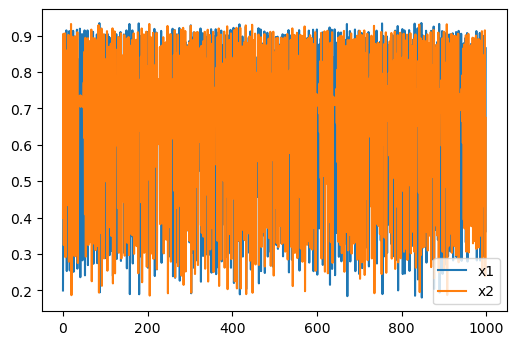

In [5]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [6]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [7]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.600047,0.701143,0.253378,0.914234,0.527267,0.825667,0.339130,0.889646,0.408160,0.869851,0.599200,0.200000
1,0.860878,0.762617,0.701143,0.253378,0.914234,0.527267,0.825667,0.339130,0.889646,0.408160,0.869851,0.599200
2,0.434072,0.638346,0.762617,0.701143,0.253378,0.914234,0.527267,0.825667,0.339130,0.889646,0.408160,0.869851
3,0.901766,0.853256,0.638346,0.762617,0.701143,0.253378,0.914234,0.527267,0.825667,0.339130,0.889646,0.408160
4,0.278946,0.419433,0.853256,0.638346,0.762617,0.701143,0.253378,0.914234,0.527267,0.825667,0.339130,0.889646
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.831383,0.373356,0.874811,0.601412,0.200220,0.926119,0.528109,0.812259,0.664888,0.752189,0.282485,0.913384
786,0.488497,0.862646,0.373356,0.874811,0.601412,0.200220,0.926119,0.528109,0.812259,0.664888,0.752189,0.282485
787,0.907814,0.418388,0.862646,0.373356,0.874811,0.601412,0.200220,0.926119,0.528109,0.812259,0.664888,0.752189
788,0.288389,0.893236,0.418388,0.862646,0.373356,0.874811,0.601412,0.200220,0.926119,0.528109,0.812259,0.664888


In [8]:
# x_2 = x_2.iloc[0:80,[0]]#原始数据
# x_t = x_1.iloc[0:80,[0]]#原始数据
# x_t1 = x_1.iloc[1:81,[0]]
# x_t1 = x_t1.reset_index(drop=True)#更改索引
# x_t1.columns=['x_t1']#重命名列名

# x_t2 = x_1.iloc[2:82,[0]]
# x_t2 = x_t2.reset_index(drop=True)#更改索引
# x_t2.columns=['x_t2']#重命名列名
# x_t3 = x_1.iloc[3:83,[0]]
# x_t3 = x_t3.reset_index(drop=True)#更改索引
# x_t3.columns=['x_t3']#重命名列名
# x_t4 = x_1.iloc[4:84,[0]]
# x_t4 = x_t4.reset_index(drop=True)#更改索引
# x_t4.columns=['x_t4']#重命名列名
# x_t5 = x_1.iloc[5:85,[0]]
# x_t5 = x_t5.reset_index(drop=True)#更改索引
# x_t5.columns=['x_t5']#重命名列名
# x_t6 = x_1.iloc[6:86,[0]]
# x_t6 = x_t6.reset_index(drop=True)#更改索引
# x_t6.columns=['x_t6']#重命名列名
# x_t7 = x_1.iloc[7:87,[0]]
# x_t7 = x_t7.reset_index(drop=True)#更改索引
# x_t7.columns=['x_t7']#重命名列名
# x_t8 = x_1.iloc[8:88,[0]]
# x_t8 = x_t8.reset_index(drop=True)#更改索引
# x_t8.columns=['x_t8']#重命名列名
# x_t9 = x_1.iloc[9:89,[0]]
# x_t9 = x_t9.reset_index(drop=True)#更改索引
# x_t9.columns=['x_t9']#重命名列名
# x_t10 = x_1.iloc[10:90,[0]]
# x_t10 = x_t10.reset_index(drop=True)#更改索引
# x_t10.columns=['x_t10']#重命名列名

# data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
#                    x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

# data

相关性分析

In [9]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.015145,0.047551,-0.047170,0.056939,-0.130890,0.209061,-0.236287,0.269147,-0.287756,0.288304,-0.265910
x_1,-0.015145,1.000000,-0.710833,0.489503,-0.433102,0.339131,-0.235828,0.165755,-0.102119,0.066433,-0.045964,0.027314
x_t1,0.047551,-0.710833,1.000000,-0.710932,0.488725,-0.432921,0.339796,-0.236305,0.167710,-0.108450,0.069343,-0.041932
x_t2,-0.047170,0.489503,-0.710932,1.000000,-0.710565,0.488605,-0.433143,0.339949,-0.237497,0.172578,-0.110726,0.066739
x_t3,0.056939,-0.433102,0.488725,-0.710565,1.000000,-0.710330,0.488018,-0.432723,0.340375,-0.241772,0.174774,-0.109748
x_t4,-0.130890,0.339131,-0.432921,0.488605,-0.710330,1.000000,-0.710151,0.487913,-0.433333,0.344802,-0.243883,0.172930
x_t5,0.209061,-0.235828,0.339796,-0.433143,0.488018,-0.710151,1.000000,-0.710223,0.489098,-0.439456,0.347592,-0.240264
x_t6,-0.236287,0.165755,-0.236305,0.339949,-0.432723,0.487913,-0.710223,1.000000,-0.710876,0.494263,-0.441858,0.344487
x_t7,0.269147,-0.102119,0.167710,-0.237497,0.340375,-0.433333,0.489098,-0.710876,1.000000,-0.713929,0.495103,-0.437535
x_t8,-0.287756,0.066433,-0.108450,0.172578,-0.241772,0.344802,-0.439456,0.494263,-0.713929,1.000000,-0.713102,0.490664


In [10]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.034851,0.058204,-0.064524,0.082164,-0.149010,0.222910,-0.260932,0.291269,-0.311016,0.308313,-0.283769
x_1,-0.034851,1.000000,-0.804916,0.564301,-0.467147,0.365836,-0.261340,0.181067,-0.114166,0.071983,-0.046898,0.031278
x_t1,0.058204,-0.804916,1.000000,-0.804917,0.564405,-0.467319,0.366101,-0.261676,0.182016,-0.118998,0.075780,-0.044624
x_t2,-0.064524,0.564301,-0.804917,1.000000,-0.805000,0.564554,-0.467549,0.366363,-0.262500,0.187058,-0.122998,0.073570
x_t3,0.082164,-0.467147,0.564405,-0.805000,1.000000,-0.805002,0.564444,-0.467420,0.366850,-0.266284,0.190183,-0.122230
x_t4,-0.149010,0.365836,-0.467319,0.564554,-0.805002,1.000000,-0.804895,0.564307,-0.467786,0.370829,-0.269647,0.189348
x_t5,0.222910,-0.261340,0.366101,-0.467549,0.564444,-0.804895,1.000000,-0.804894,0.564127,-0.472049,0.374541,-0.267901
x_t6,-0.260932,0.181067,-0.261676,0.366363,-0.467420,0.564307,-0.804894,1.000000,-0.804722,0.568515,-0.475976,0.372605
x_t7,0.291269,-0.114166,0.182016,-0.262500,0.366850,-0.467786,0.564127,-0.804722,1.000000,-0.808007,0.571185,-0.473420
x_t8,-0.311016,0.071983,-0.118998,0.187058,-0.266284,0.370829,-0.472049,0.568515,-0.808007,1.000000,-0.806931,0.566864


In [11]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.17201940243371996
0.1768723370981696
0.19652456385397496
0.21477745460307962
0.25141254037458677
0.2526264726498882
0.26065833449022424
0.2564056375429385
0.26535550637749794
0.264851337386762
0.2687607711048153


In [12]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

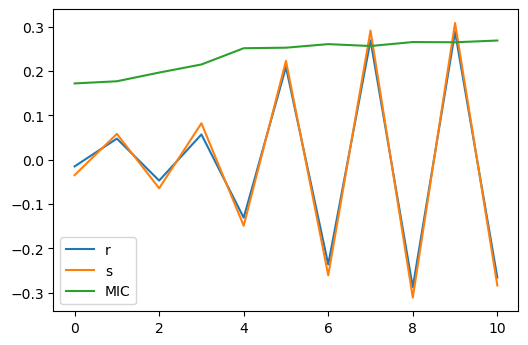

In [13]:
plt.figure(1,dpi=100)

plt.plot(rx2,label = "r")
plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()

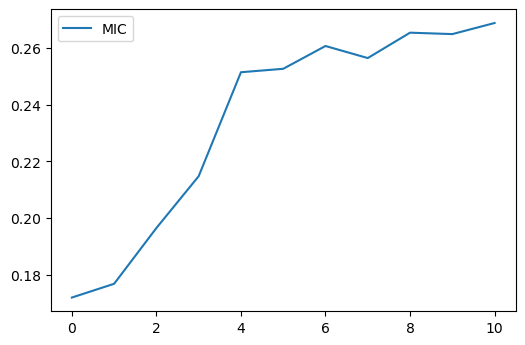

In [14]:
plt.figure(1,dpi=100)
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()